# First Look at the Data

### 1. Set up

The cell below will import all the packages required in the downstream analyses as well as set all the necessary variables and data paths.

In [2]:
import os
import pandas as pd
from qiime2 import Visualization
import matplotlib.pyplot as plt
import numpy as np

import qiime2 as q2

%matplotlib inline

# location of this week's data and all the results produced by this notebook 
# - this should be a path relative to your working directory
data_dir = 'project_data'

if not os.path.isdir(data_dir):
    os.makedirs(data_dir)

To get the dataset required for the poject run the cell below:

Sequence:

Do not run this code it will bring you in trouble!

In [8]:
#! wget -nv -O $data_dir/sequence_data.qza 'https://polybox.ethz.ch/index.php/s/AsLORlvUbwgBWTq/download'

2022-10-06 16:48:01 URL:https://polybox.ethz.ch/index.php/s/AsLORlvUbwgBWTq/download [1506379068/1506379068] -> "project_data/sequence_data.qza" [1]


Sample metadata:

In [15]:
! wget -nv -O $data_dir/sample_meta_data.tsv 'https://polybox.ethz.ch/index.php/s/QqbHeUIpIR0okB8/download'

2022-10-06 17:00:27 URL:https://polybox.ethz.ch/index.php/s/QqbHeUIpIR0okB8/download [300302/300302] -> "project_data/sample_meta_data.tsv" [1]


In [3]:
df_meta = pd.read_csv(f'{data_dir}/sample_meta_data.tsv', sep='\t')
df_meta.shape

(523, 57)

In [4]:
df_meta

,sampleid,GEN_age_cat,GEN_age_corrected,GEN_bmi_cat,GEN_bmi_corrected,GEN_cat,GEN_collection_timestamp,GEN_country,GEN_dog,GEN_elevation,...,NUT_probiotic_frequency,NUT_red_meat_frequency,NUT_salted_snacks_frequency,NUT_seafood_frequency,NUT_sugary_sweets_frequency,NUT_vegetable_frequency,NUT_vitamin_b_supplement_frequency,NUT_vitamin_d_supplement_frequency,NUT_whole_eggs,NUT_whole_grain_frequency
0,10317.000046,20s,20.0,Normal,23.75,False,2016-08-25 18:30:00,USA,True,1919.3,...,Rarely,Regularly,Occasionally,Rarely,Occasionally,Occasionally,Never,Never,Daily,Daily
1,10317.000050,Not provided,NaN,Overweight,25.61,False,2016-07-06 09:00:00,United Kingdom,False,65.5,...,Rarely,Rarely,Regularly,Occasionally,Regularly,Regularly,Never,Never,Rarely,Occasionally
2,10317.000038,30s,39.0,Overweight,27.67,False,2016-06-29 09:30:00,United Kingdom,False,44.5,...,Never,Occasionally,Daily,Occasionally,Rarely,Occasionally,Never,Never,Regularly,Occasionally
3,10317.000047,50s,56.0,Normal,19.71,False,2016-07-12 17:30:00,Germany,False,8.7,...,Daily,Occasionally,Rarely,Not provided,Rarely,Regularly,Daily,Daily,Rarely,Regularly
4,10317.000046,40s,45.0,Normal,23.15,False,2016-05-24 19:00:00,United Kingdom,True,68.8,...,Regularly,Never,Never,Occasionally,Never,Daily,Rarely,Occasionally,Regularly,Daily
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,10317.000050,60s,65.0,Normal,22.48,False,2016-07-26 09:00:00,United Kingdom,False,41.4,...,Daily,Regularly,Not provided,Occasionally,Rarely,Daily,Never,Daily,Regularly,Never
519,10317.000046,20s,22.0,Normal,19.04,True,2016-05-17 18:45:00,Canada,True,NaN,...,Never,Never,Rarely,Never,Occasionally,Daily,Never,Never,Occasionally,Occasionally
520,10317.000053,60s,63.0,Normal,21.87,False,2016-08-02 20:00:00,United Kingdom,False,17.8,...,Occasionally,Occasionally,Rarely,Occasionally,Rarely,Daily,Never,Never,Occasionally,Occasionally
521,10317.000053,40s,49.0,Normal,18.84,False,2016-07-24 07:15:00,United Kingdom,False,69.9,...,Daily,Rarely,Never,Daily,Never,Daily,Never,Never,Daily,Never


Show all columns we have in our metadata:

In [5]:
df_meta.columns.tolist()

['sampleid',
 'GEN_age_cat',
 'GEN_age_corrected',
 'GEN_bmi_cat',
 'GEN_bmi_corrected',
 'GEN_cat',
 'GEN_collection_timestamp',
 'GEN_country',
 'GEN_dog',
 'GEN_elevation',
 'GEN_geo_loc_name',
 'GEN_height_cm',
 'GEN_host_common_name',
 'GEN_last_move',
 'GEN_last_travel',
 'GEN_latitude',
 'GEN_level_of_education',
 'GEN_longitude',
 'GEN_race',
 'GEN_sample_type',
 'GEN_sex',
 'GEN_weight_kg',
 'NUT_alcohol_consumption',
 'NUT_alcohol_frequency',
 'NUT_alcohol_types_beercider',
 'NUT_alcohol_types_red_wine',
 'NUT_alcohol_types_sour_beers',
 'NUT_alcohol_types_spiritshard_alcohol',
 'NUT_alcohol_types_unspecified',
 'NUT_alcohol_types_white_wine',
 'NUT_artificial_sweeteners',
 'NUT_diet_type',
 'NUT_drinks_per_session',
 'NUT_fed_as_infant',
 'NUT_fermented_plant_frequency',
 'NUT_frozen_dessert_frequency',
 'NUT_fruit_frequency',
 'NUT_gluten',
 'NUT_high_fat_red_meat_frequency',
 'NUT_homecooked_meals_frequency',
 'NUT_lowgrain_diet_type',
 'NUT_meat_eggs_frequency',
 'NUT_mil

In [6]:
# check if we have replicates
len(df_meta['sampleid'].unique())

523

In [7]:
# if we want sampleid as our index: 
#df_meta = pd.read_csv(f'{data_dir}/sample_meta_data.tsv', sep='\t', index_col=0)

We want to know what kind of samples we have:


In [8]:
df_meta['GEN_sample_type'].value_counts()

Stool    523
Name: GEN_sample_type, dtype: int64

From the column names we can see that there must be stool from cats and dogs:


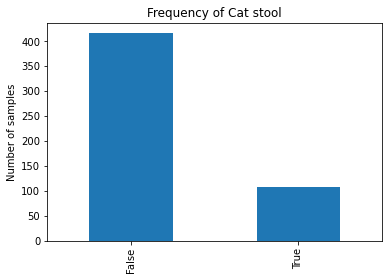

In [9]:
df_meta['GEN_cat'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of Cat stool')
plt.show()

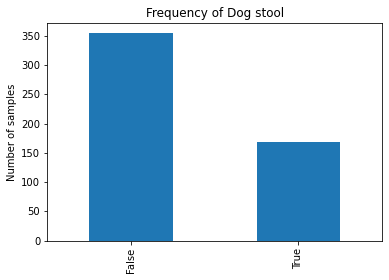

In [10]:
df_meta['GEN_dog'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of Dog stool')
plt.show()

We clean our data from cat and dog stool:

In [11]:
df_meta_cleaned = df_meta[df_meta['GEN_cat']==False]
df_meta_clean = df_meta_cleaned[df_meta_cleaned['GEN_dog']==False]

# maybe we want to remove as well the columns: 'GEN_cat','GEN_dog', 'GEN_age_cat',  'GEN_bmi_cat',

In [36]:
#Maybe also remove rows NaN:

#df_meta[df_meta.isna().any(axis=1)]
#df.dropna()

# Check for missing data
df_meta_clean.isnull().sum()

sampleid                                  0
GEN_age_cat                               0
GEN_age_corrected                        17
GEN_bmi_cat                               0
GEN_bmi_corrected                         9
GEN_cat                                   0
GEN_collection_timestamp                  0
GEN_country                               0
GEN_dog                                   0
GEN_elevation                            19
GEN_geo_loc_name                          0
GEN_height_cm                             3
GEN_host_common_name                      0
GEN_last_move                             0
GEN_last_travel                           0
GEN_latitude                             19
GEN_level_of_education                    0
GEN_longitude                            19
GEN_race                                  0
GEN_sample_type                           0
GEN_sex                                   0
GEN_weight_kg                             2
NUT_alcohol_consumption         

We check:

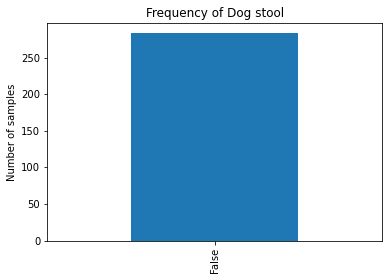

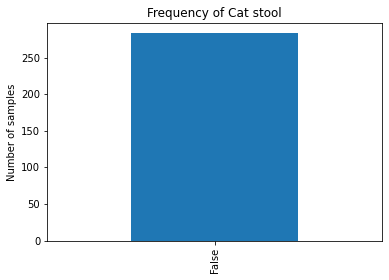

In [13]:
df_meta_clean['GEN_dog'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of Dog stool')
plt.show()
df_meta_clean['GEN_cat'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of Cat stool')
plt.show()

We are now working with the "clean data" and explore it:

Check how many samples are left

In [14]:
len(df_meta_clean['sampleid'].unique())

283

In [15]:
df_meta_clean['GEN_sex'].value_counts()

female          145
male            136
Not provided      2
Name: GEN_sex, dtype: int64

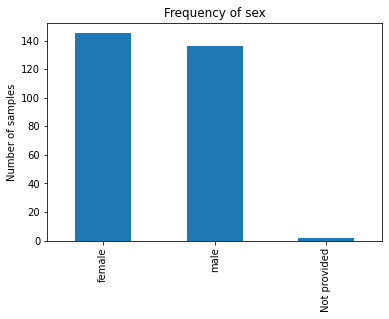

In [16]:
df_meta_clean['GEN_sex'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of sex')
plt.show()

In [17]:
df_meta_clean['GEN_host_common_name'].value_counts()

human    283
Name: GEN_host_common_name, dtype: int64

Text(0.5, 1.0, 'Race')

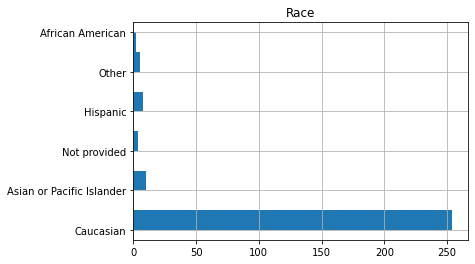

In [18]:
df_meta_clean['GEN_race'].hist(orientation='horizontal' )
plt.title('Race')

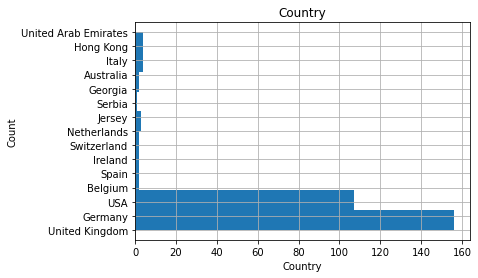

In [19]:
plt.hist('GEN_country', data=df_meta_clean, orientation='horizontal')
plt.ylabel('Count')
plt.xlabel('Country')
plt.title('Country')
plt.grid(True)
plt.show()

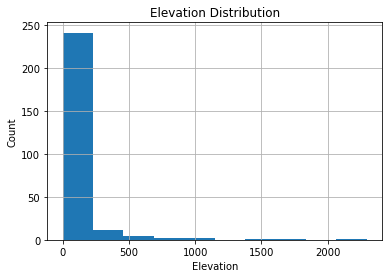

In [30]:
plt.hist('GEN_elevation', data=df_meta_clean)
plt.ylabel('Count')
plt.xlabel('Elevation')
plt.title('Elevation Distribution')
plt.grid(True)
plt.show()

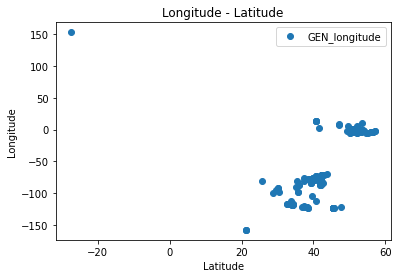

In [33]:
df_meta_clean.plot(x='GEN_latitude', y='GEN_longitude', style='o')
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.title('Longitude - Latitude')
plt.show()

We note that most samples come from caucasians. Fruthermore, there are almost no samples from Switzerland which we should keep in mind when we aim to give suggestions to the ETH mensa chefs. Most of the samples come from USA, Germany and United Kingdom.

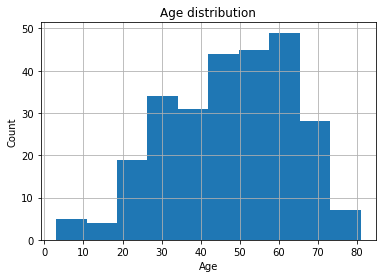

In [20]:
plt.hist('GEN_age_corrected', data=df_meta_clean)
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('Age distribution')
plt.grid(True)
plt.show()

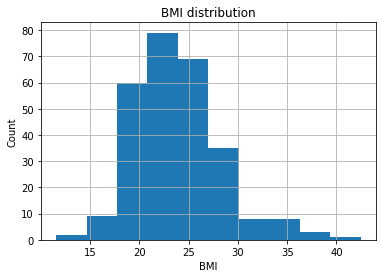

In [21]:
plt.hist('GEN_bmi_corrected', data=df_meta_clean)
plt.ylabel('Count')
plt.xlabel('BMI')
plt.title('BMI distribution')
plt.grid(True)
plt.show()

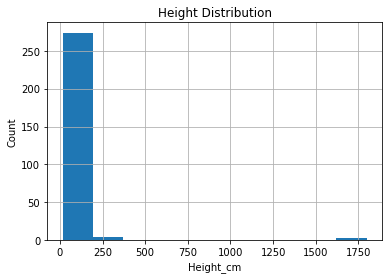

In [34]:
plt.hist('GEN_height_cm', data=df_meta_clean)
plt.ylabel('Count')
plt.xlabel('Height_cm')
plt.title('Height Distribution')
plt.grid(True)
plt.show()

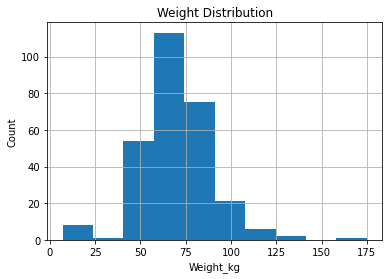

In [35]:
plt.hist('GEN_weight_kg', data=df_meta_clean)
plt.ylabel('Count')
plt.xlabel('Weight_kg')
plt.title('Weight Distribution')
plt.grid(True)
plt.show()

In [22]:
df_meta_clean['GEN_level_of_education'].value_counts()

Graduate or Professional degree         132
Bachelor's degree                        70
Some college or technical school         38
Some graduate school or professional     14
High School or GED equilivant            12
Did not complete high school              7
Not provided                              7
Associate's degree                        3
Name: GEN_level_of_education, dtype: int64

Save cleaned Data in CSV to be able to reload it in next tasks:

In [23]:
#df_meta_clean.to_csv(f'{data_dir}/cleaned_sample_meta_data.tsv', sep='\t')

### Check correlations

Work only with GEN data, NUT data is explored in Eating_hbits file

In [24]:
names=df_meta_clean.columns
GEN_INDEX = names[df_meta_clean.columns.str.contains('GEN')]

df_GEN = df_meta_clean[GEN_INDEX]
df_GEN.head()

,GEN_age_cat,GEN_age_corrected,GEN_bmi_cat,GEN_bmi_corrected,GEN_cat,GEN_collection_timestamp,GEN_country,GEN_dog,GEN_elevation,GEN_geo_loc_name,...,GEN_host_common_name,GEN_last_move,GEN_last_travel,GEN_latitude,GEN_level_of_education,GEN_longitude,GEN_race,GEN_sample_type,GEN_sex,GEN_weight_kg
1,Not provided,NaN,Overweight,25.61,False,2016-07-06 09:00:00,United Kingdom,False,65.5,United Kingdom:England,...,human,I have lived in my current state of residence ...,1 year,50.2,Some graduate school or professional,-5.5,Caucasian,Stool,female,63.0
2,30s,39.0,Overweight,27.67,False,2016-06-29 09:30:00,United Kingdom,False,44.5,United Kingdom:England,...,human,I have lived in my current state of residence ...,Month,53.4,Not provided,-2.3,Caucasian,Stool,male,90.0
3,50s,56.0,Normal,19.71,False,2016-07-12 17:30:00,Germany,False,8.7,Germany:HH,...,human,I have lived in my current state of residence ...,1 year,53.6,Graduate or Professional degree,10.0,Caucasian,Stool,female,53.0
6,60s,68.0,Normal,24.12,False,2016-05-10 10:00:00,United Kingdom,False,22.9,United Kingdom:Unspecified,...,human,I have lived in my current state of residence ...,3 months,53.6,Some college or technical school,-0.6,Caucasian,Stool,male,69.0
9,40s,46.0,Normal,22.60,False,2016-05-23 10:05:00,USA,False,261.1,USA:MI,...,human,I have lived in my current state of residence ...,3 months,42.4,Graduate or Professional degree,-83.5,Caucasian,Stool,male,82.0


In [44]:
df_GEN.shape

(283, 21)

In [28]:
df_GEN.columns.tolist()

['GEN_age_cat',
 'GEN_age_corrected',
 'GEN_bmi_cat',
 'GEN_bmi_corrected',
 'GEN_cat',
 'GEN_collection_timestamp',
 'GEN_country',
 'GEN_dog',
 'GEN_elevation',
 'GEN_geo_loc_name',
 'GEN_height_cm',
 'GEN_host_common_name',
 'GEN_last_move',
 'GEN_last_travel',
 'GEN_latitude',
 'GEN_level_of_education',
 'GEN_longitude',
 'GEN_race',
 'GEN_sample_type',
 'GEN_sex',
 'GEN_weight_kg']

In [29]:
df_GEN.dtypes

GEN_age_cat                  object
GEN_age_corrected           float64
GEN_bmi_cat                  object
GEN_bmi_corrected           float64
GEN_cat                        bool
GEN_collection_timestamp     object
GEN_country                  object
GEN_dog                        bool
GEN_elevation               float64
GEN_geo_loc_name             object
GEN_height_cm               float64
GEN_host_common_name         object
GEN_last_move                object
GEN_last_travel              object
GEN_latitude                float64
GEN_level_of_education       object
GEN_longitude               float64
GEN_race                     object
GEN_sample_type              object
GEN_sex                      object
GEN_weight_kg               float64
dtype: object

In [41]:
df_GEN_cont = df_GEN.select_dtypes(include=['float64'])
df_GEN_cat = df_GEN.select_dtypes(include=['object'])

In [42]:
df_GEN_cont.describe()

,GEN_age_corrected,GEN_bmi_corrected,GEN_elevation,GEN_height_cm,GEN_latitude,GEN_longitude,GEN_weight_kg
count,266.000000,274.000000,264.000000,280.000000,264.000000,264.000000,281.000000
mean,47.609023,23.880693,109.800758,180.371429,45.996970,-40.177652,70.092527
std,16.124204,4.490600,231.276037,133.355339,8.909617,52.445656,19.743136
min,3.000000,11.570000,-0.900000,15.000000,-27.500000,-157.800000,7.000000
25%,36.000000,20.770000,20.475000,162.000000,40.575000,-84.425000,58.000000
50%,49.000000,23.410000,42.900000,170.000000,50.950000,-3.100000,69.000000
75%,60.000000,26.310000,101.225000,180.000000,51.600000,-0.300000,82.000000
max,81.000000,42.440000,2295.200000,1800.000000,57.200000,153.000000,175.000000


In [45]:
df_GEN_cat.describe()

,GEN_age_cat,GEN_bmi_cat,GEN_collection_timestamp,GEN_country,GEN_geo_loc_name,GEN_host_common_name,GEN_last_move,GEN_last_travel,GEN_level_of_education,GEN_race,GEN_sample_type,GEN_sex
count,283,283,283,283,283,283,283,283,283,283,283,283
unique,9,5,278,15,44,1,6,6,8,6,1,3
top,50s,Normal,2016-08-01 08:00:00,United Kingdom,United Kingdom:England,human,I have lived in my current state of residence ...,I have not been outside of my country of resid...,Graduate or Professional degree,Caucasian,Stool,female
freq,58,155,3,155,101,283,255,95,132,254,283,145
